# Câu 1:

In [ ]:
#import các thư viện
import keras
import matplotlib.pyplot as plt 
from keras import backend as k
import tensorflow as tf
import numpy as np
#chọn hệ số lamda
regularizer = 0.0005

In [ ]:
## tải CIFAR-100 dataset từ keras
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
##resacle ảnh thành ảnh thực trong đoạn [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

(50000, 32, 32, 3)

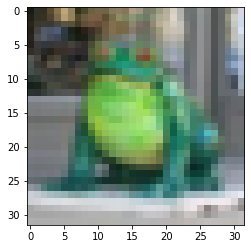

In [ ]:
plt.imshow(X_train[19])
X_train.shape
# print(y_train[19])

In [ ]:
import cv2
## Resize toàn bộ ảnh train tập train và test
X_train = np.array([cv2.resize(img, dsize=(32,32)) for img in X_train])
X_test = np.array([cv2.resize(img, dsize=(32,32)) for img in X_test])
print("Kích thước tập sau khi resize: ", X_train.shape, X_test.shape)

#Tách một phần tập train thành tập valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

Kích thước tập sau khi resize:  (50000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
vgg19 = keras.applications.vgg19.VGG19(include_top=True, # include_top: True/False: có thêm 3 lớp fully-conndedted ở cuối model không
                                       weights=None,     # weights: None/'imagenet': None: khởi tạo tham số ngẫu nhiên; 'imagenet': load 8 trọng số của model được train với imagenet
                                       input_tensor=None, # input_tensor: truyền lớp Input vào nếu muốn
                                       input_shape=(32,32,3), # xác định kích thước input
                                       pooling='max', # None/'max'/'avg': chế độ pooling trong các lớp pool 
                                       classes=10)   # classes: số lớp output
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

**Cấu trúc mô hình**
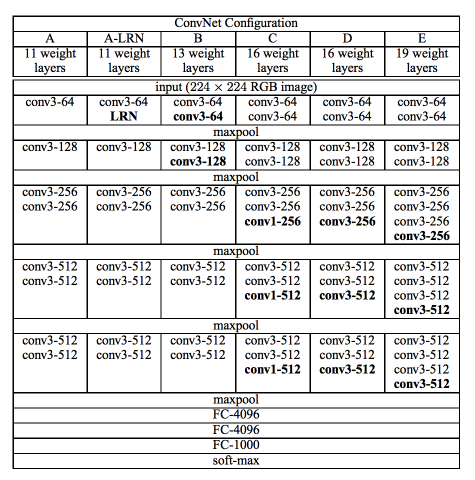

In [ ]:
#Khởi tạo mô hình
model=keras.Sequential()

# #phải reshape lại input theo đúng (?,A,B,C)
# model.add(keras.layers.Reshape((32,32,3),input_shape=(32,32,3)))
model.add(keras.layers.Input(shape=(32,32,3)))

In [ ]:
# Block 1
# Gồm 2 lớp Convolution và 1 lớp maxpooling pool_size là 2x2
# filter 64, kernel_size là 3x3 và stride 1x1, có padding, activation là relu
model.add(keras.layers.Convolution2D(filters=64,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding="same",
                                     activation=keras.activations.relu))
model.add(keras.layers.Convolution2D(filters=64,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding='same',
                                     activation=keras.activations.relu))
model.add(keras.layers.MaxPool2D(pool_size=[2,2],
                                 strides=[2,2]))

In [ ]:
#Block 2
#Gồm 2 lớp Convolution và 1 lớp maxpooling với pool_size là 2x2
#filter 128, kernel_size là 3x3 và stride 1x1, có padding, activation là relu
model.add(keras.layers.Convolution2D(filters=128,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding="same",
                                     activation=keras.activations.relu))
model.add(keras.layers.Convolution2D(filters=128,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding="same",
                                     activation=keras.activations.relu))
model.add(keras.layers.MaxPool2D(pool_size=[2,2],
                    strides=[2,2]))

In [ ]:
#block3
#Gồm 4 lớp Convolution và 1 lớp maxpooling với pool_size là 2x2
#filter 256, kernel_size là 3x3 và stride 1x1, có padding, activation là relu
model.add(keras.layers.Convolution2D(filters=256,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding="same",
                                     activation=keras.activations.relu))
model.add(keras.layers.Convolution2D(filters=256,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding="same",
                                     activation=keras.activations.relu))
model.add(keras.layers.Convolution2D(filters=256,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding="same",
                                     activation=keras.activations.relu))
model.add(keras.layers.Convolution2D(filters=256,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding="same",
                                     activation=keras.activations.relu))
model.add(keras.layers.MaxPool2D(pool_size=[2,2],
                          strides=[2,2]))

In [ ]:
#block4
#Gồm 4 lớp Convolution và 1 lớp maxpooling với pool_size là 2x2
#filter 512, kernel_size là 3x3 và stride 1x1, có padding, activation là relu
model.add(keras.layers.Convolution2D(filters=512,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding="same",
                                     activation=keras.activations.relu))
model.add(keras.layers.Convolution2D(filters=512,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding="same",
                                     activation=keras.activations.relu))
model.add(keras.layers.Convolution2D(filters=512,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding="same",
                                     activation=keras.activations.relu))
model.add(keras.layers.Convolution2D(filters=512,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding="same",
                                     activation=keras.activations.relu))
model.add(keras.layers.MaxPool2D(pool_size=[2,2],
                                 strides=[2,2]))

In [ ]:
#block5
#Gồm 4 lớp Convolution và 1 lớp maxpooling với pool_size là 2x2
#filter 512, kernel_size là 3x3 và stride 1x1, có padding, activation là relu
model.add(keras.layers.Convolution2D(filters=512,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding="same",
                                     activation=keras.activations.relu))
model.add(keras.layers.Convolution2D(filters=512,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding="same",
                                     activation=keras.activations.relu))
model.add(keras.layers.Convolution2D(filters=512,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding="same",
                                     activation=keras.activations.relu))
model.add(keras.layers.Convolution2D(filters=512,
                                     kernel_size=[3,3],
                                     strides=[1,1],
                                     padding="same",
                                     activation=keras.activations.relu))
model.add(keras.layers.MaxPool2D(pool_size=[2,2],
                                 strides=[2,2]))

In [ ]:
#block 6
#Gồm lớp Flatten để duỗi ra
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=4096,
                             activation=keras.activations.relu,
                             kernel_regularizer=keras.regularizers.l2(regularizer)))
model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Dense(units=4096,
                             activation=keras.activations.relu,
                             kernel_regularizer=keras.regularizers.l2(regularizer)))
model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Dense(units=10,
                             activation=keras.activations.softmax))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),    ##tự khai báo Optimizer với learning rate 10^-4
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [ ]:
### Tạo một callback ModelCheckpoint: callback này sẽ lưu model mỗi khi tìm được một model tốt hơn
#### filepath: đường dẫn file muốn lưu
#### monitor: đại lượng quyết định xem model có "tốt hơn" hay không
#### mode='auto'/'max'/'min': đại lượng monitor lớn hay nhỏ là tốt hơn
#### verbose: có thông báo mỗi lần lưu ko
#### save_best_only: chỉ lưu model tốt nhất
mc = keras.callbacks.ModelCheckpoint(filepath="vgg19_cifar_10.h5", 
                                     monitor='val_loss',
                                     mode='min', 
                                     verbose=0, 
                                     save_best_only=True)

In [ ]:
## Train
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[mc])                     ##sử dụng callback ModelCheckpoint trong quá trình train


## Đánh giá model trên tập test
valid_loss, valid_acc = model.evaluate(X_valid, y_valid)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Valid: loss {} acc {} -- Test: loss {} valid {}".format(valid_loss, valid_acc, test_loss, test_acc))

## Load lại model tốt nhất đã lưu
print("best model: ")
model.load_weights("vgg19_cifar_10.h5")
valid_loss, valid_acc = model.evaluate(X_valid, y_valid)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Valid: loss {} acc {} -- Test: loss {} acc {}".format(valid_loss, valid_acc, test_loss, test_acc))

Epoch 1/100
704/704 [==============================] - 37s 53ms/step - loss: 2.5675 - accuracy: 0.1176 - val_loss: 2.0335 - val_accuracy: 0.1770
Epoch 2/100
704/704 [==============================] - 38s 54ms/step - loss: 1.8958 - accuracy: 0.2102 - val_loss: 1.8313 - val_accuracy: 0.2472
Epoch 3/100
704/704 [==============================] - 38s 54ms/step - loss: 1.7507 - accuracy: 0.2905 - val_loss: 1.5928 - val_accuracy: 0.3852
Epoch 4/100
704/704 [==============================] - 38s 54ms/step - loss: 1.5266 - accuracy: 0.4023 - val_loss: 1.4927 - val_accuracy: 0.4286
Epoch 5/100
704/704 [==============================] - 38s 55ms/step - loss: 1.3573 - accuracy: 0.4798 - val_loss: 1.2974 - val_accuracy: 0.5272
Epoch 6/100
704/704 [==============================] - 38s 55ms/step - loss: 1.1875 - accuracy: 0.5708 - val_loss: 1.1057 - val_accuracy: 0.6048
Epoch 7/100
704/704 [==============================] - 38s 54ms/step - loss: 1.0263 - accuracy: 0.6415 - val_loss: 1.0675 - val_ac

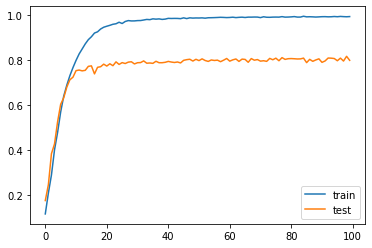

In [ ]:
# plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Câu 2: Chỉnh các tham số (lrn_rate, l2 weight decay, epochs, batch_size) và nhận xét performance sẽ thay đổi như thế nào